# Proyecto 1 
## Ciencia de Datos con Python
#### Carlos Alfredo Rivera Yong 23008861

In [21]:
import numpy as npy
import pandas as pds
import seaborn as sbn
import matplotlib.pyplot as mpl

In [22]:
data = pds.DataFrame(npy.load("proyecto_training_data.npy"),columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])


## Librerias

In [23]:
npy.random.shuffle(data.values)
N =int(0.8*len(data))
train = data.iloc[:N]
valid = data.iloc[N:].reset_index(drop=True)


Se decribe para cada una de las variables todas sus metricas como: conteo,media, desviacion estandar, minimo, cuartiles y maximo; usando la funcion describe de pandas.

In [24]:
data.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


## Histogramas de cada variable

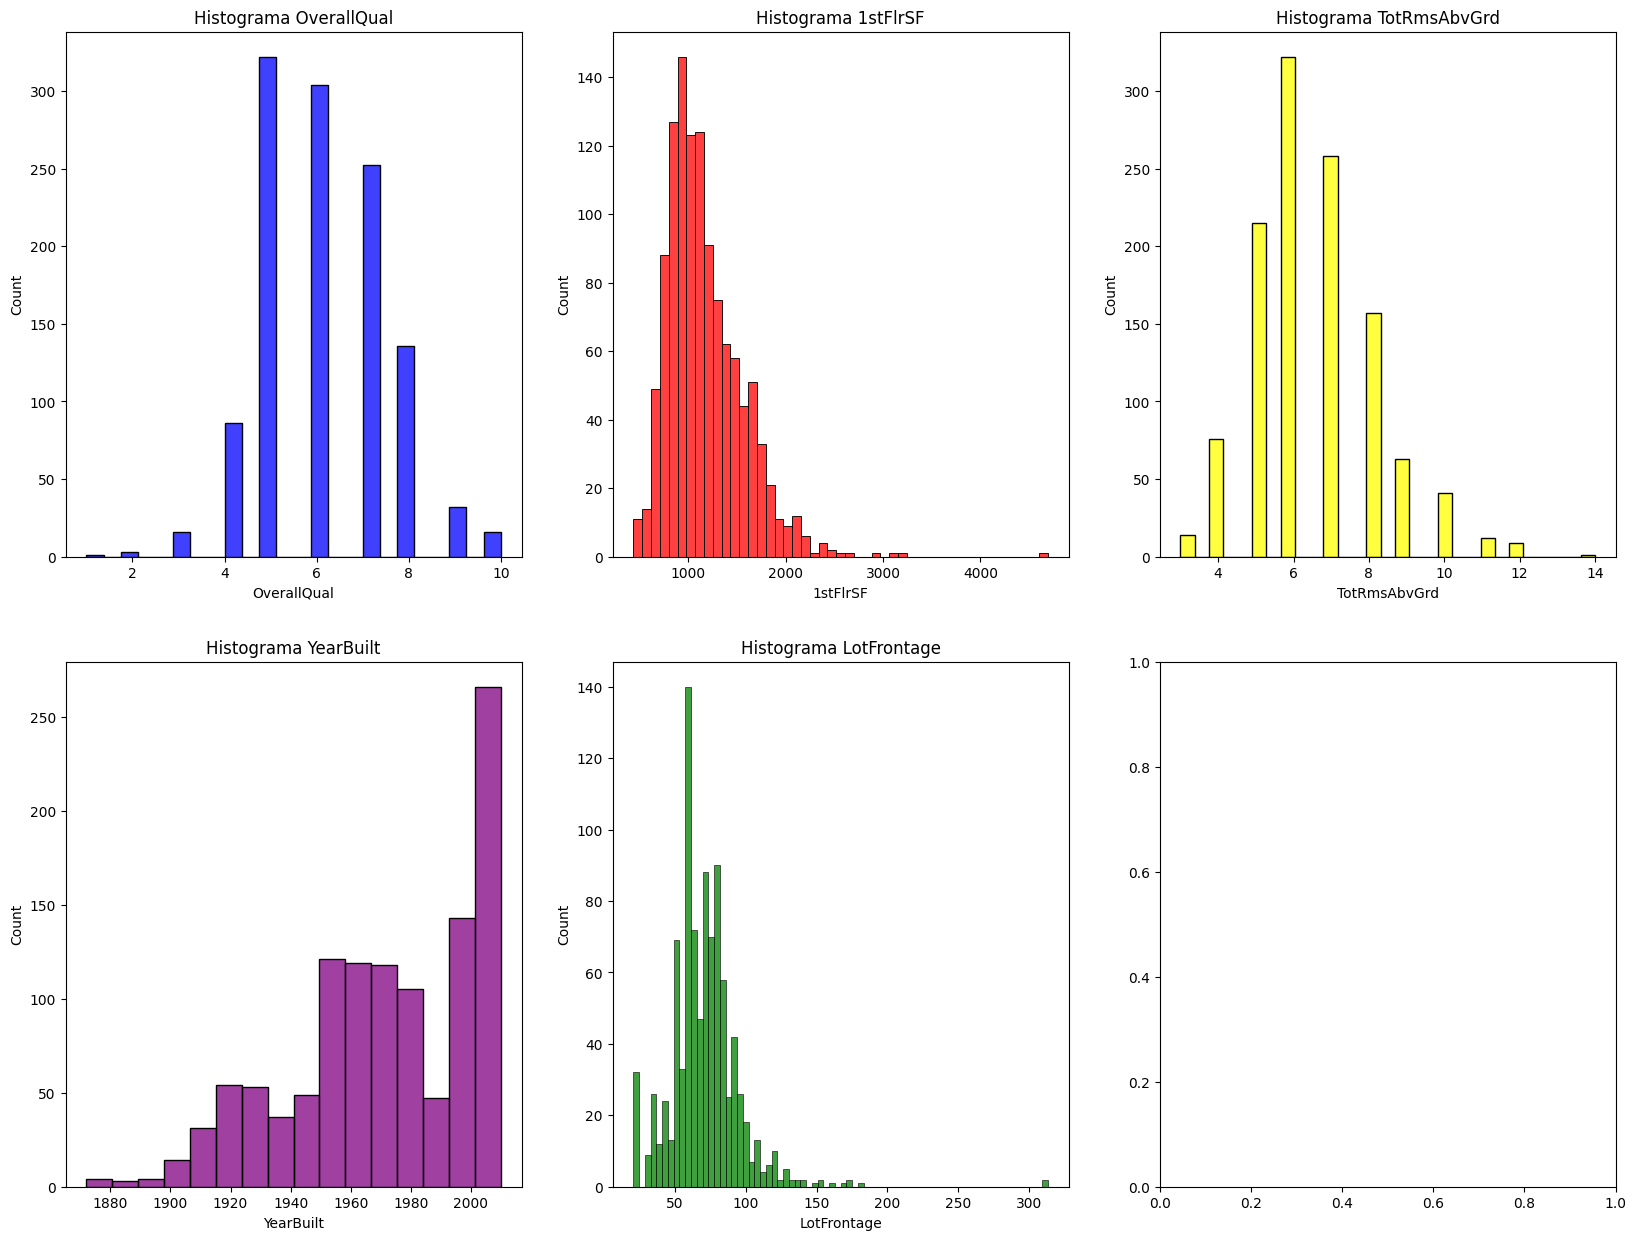

In [25]:
figura, ejes = mpl.subplots(nrows = 2,ncols = 3, figsize = (20,15))
sbn.histplot(ax=ejes[0][0],data=train["OverallQual"], color= "blue")
sbn.histplot(ax=ejes[0][1],data=train["1stFlrSF"], color= "red")
sbn.histplot(ax=ejes[0][2],data=train["TotRmsAbvGrd"], color= "yellow")
sbn.histplot(ax=ejes[1][0],data=train["YearBuilt"], color= "purple")
sbn.histplot(ax=ejes[1][1],data=train["LotFrontage"], color= "green")
ejes[0][0].set_title("Histograma OverallQual")
ejes[0][1].set_title("Histograma 1stFlrSF")
ejes[0][2].set_title("Histograma TotRmsAbvGrd")
ejes[1][0].set_title("Histograma YearBuilt")
ejes[1][1].set_title("Histograma LotFrontage")
mpl.show()

## Dispersion variable dependiente vs independientes

C:\Users\carlo\AppData\Local\Temp\ipykernel_25372\544338849.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


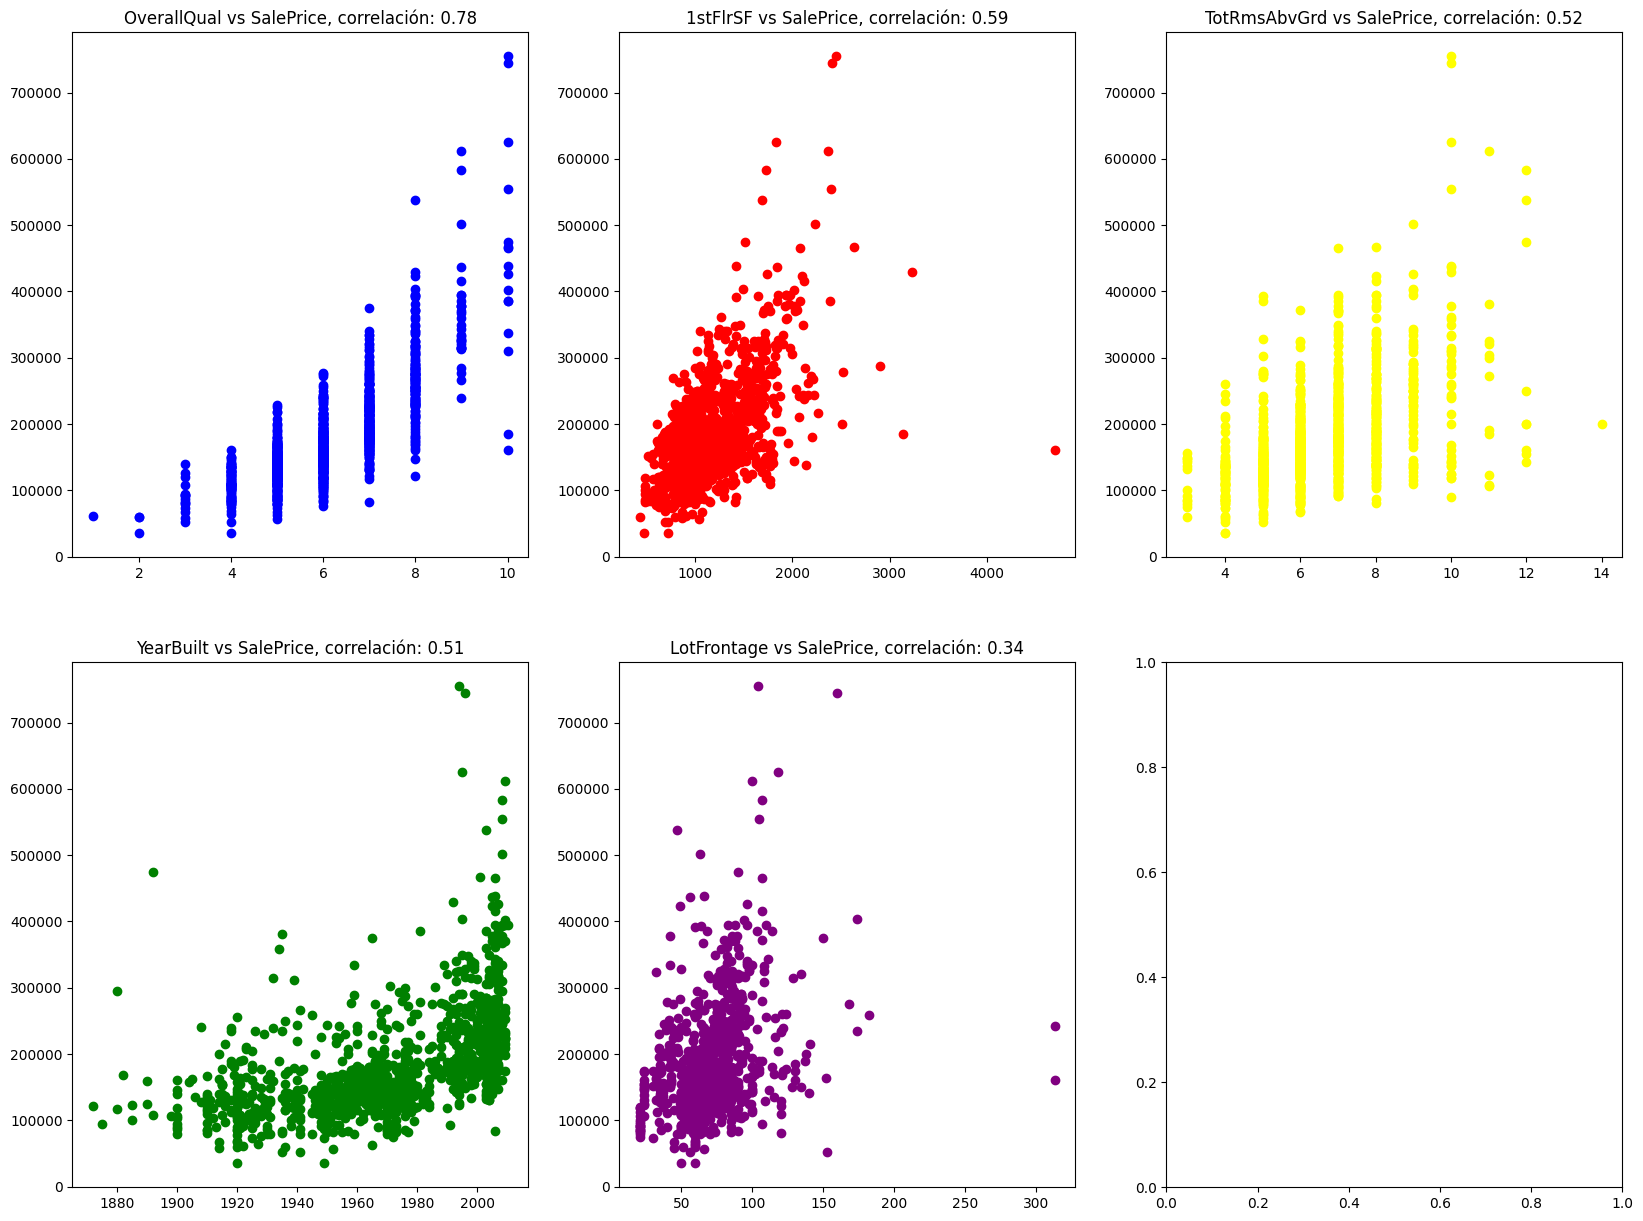

In [26]:
cor1 = train["SalePrice"].corr(train["OverallQual"])
cor2 = train["SalePrice"].corr(train["1stFlrSF"])
cor3 = train["SalePrice"].corr(train["TotRmsAbvGrd"])
cor4 = train["SalePrice"].corr(train["YearBuilt"])
cor5 = train["SalePrice"].corr(train["LotFrontage"])

figura, ejes = mpl.subplots(nrows = 2,ncols = 3, figsize = (20,15))
ejes[0][0].scatter(x=train["OverallQual"], y=train["SalePrice"],color= "blue")
ejes[0][1].scatter(x=train["1stFlrSF"], y=train["SalePrice"],color= "red")
ejes[0][2].scatter(x=train["TotRmsAbvGrd"], y=train["SalePrice"],color= "yellow")
ejes[1][0].scatter(x=train["YearBuilt"], y=train["SalePrice"],color= "green")
ejes[1][1].scatter(x=train["LotFrontage"], y=train["SalePrice"],color= "purple")
ejes[0][0].set_title(f"OverallQual vs SalePrice, correlación: {round(cor1,2)}")
ejes[0][1].set_title(f"1stFlrSF vs SalePrice, correlación: {round(cor2,2)}")
ejes[0][2].set_title(f"TotRmsAbvGrd vs SalePrice, correlación: {round(cor3,2)}")
ejes[1][0].set_title(f"YearBuilt vs SalePrice, correlación: {round(cor4,2)}")
ejes[1][1].set_title(f"LotFrontage vs SalePrice, correlación: {round(cor5,2)}")
figura.show()

Se observa que la variable OverallQual y 1stFlrSF son las que mas se correlacionan con la variable dependiente.

## Regresion a Pie para las dos variables con mayor correlacion

In [27]:
def regresion(x,y,epochs,imprimir_error_cada,alpha):

    models = []
    errors = []
    coefs = [0,0]
    x = npy.array([x,npy.ones(len(x))])
    for i in range(epochs):
        y1= npy.dot(coefs,x)
        error= (1/2*len(y))*(npy.sum(npy.square(y-y1)))
        if (i % imprimir_error_cada == 0):
            print(f'El error en la iteración {i} es {error}')
        coefs = coefs+(1/len(y)*(npy.dot((y-y1),x.T)))*alpha
        models.append(coefs)
        errors.append(error)
    return models, errors           

        

### Se Grafica el arreglo

In [28]:
def graph(errors):
    mpl.plot(errors,color="red")
    mpl.title("Curva de error")
    mpl.show()

### Arreglo de Diagramas

In [29]:
def model_graph(x,y,models,models_cada):
    mpl.figure(figsize=(10,15))
    mpl.scatter(x,y,color="red")
    for i,model in enumerate(models):
        if (i%models_cada==0):
            x_line = npy.linspace(0, max(x),1000)
            y_line = npy.dot(model,npy.array([x_line,npy.ones(len(x_line))]))
            mpl.plot(x_line,y_line,color="blue")
    mpl.show()        
        

In [30]:
### Curva de error y Diagrama de dispersion OverallQual

El error en la iteración 0 es 2.663899428087617e+16
El error en la iteración 100 es 1.299772418225293e+16
El error en la iteración 200 es 6895190475802520.0
El error en la iteración 300 es 4165080336636372.5
El error en la iteración 400 es 2943610475828541.5
El error en la iteración 500 es 2397024933512535.5
El error en la iteración 600 es 2152346333565818.5
El error en la iteración 700 es 2042724746436663.2
El error en la iteración 800 es 1993520526924239.0
El error en la iteración 900 es 1971343929739367.2


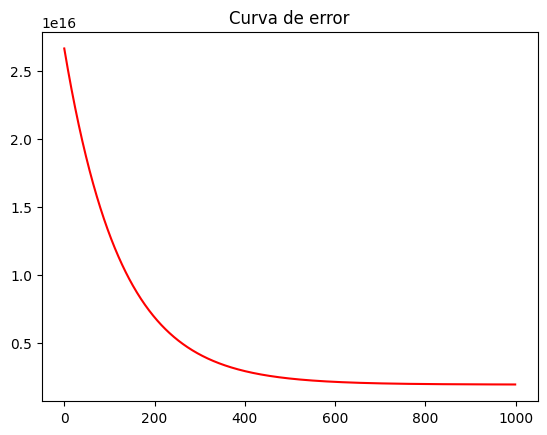

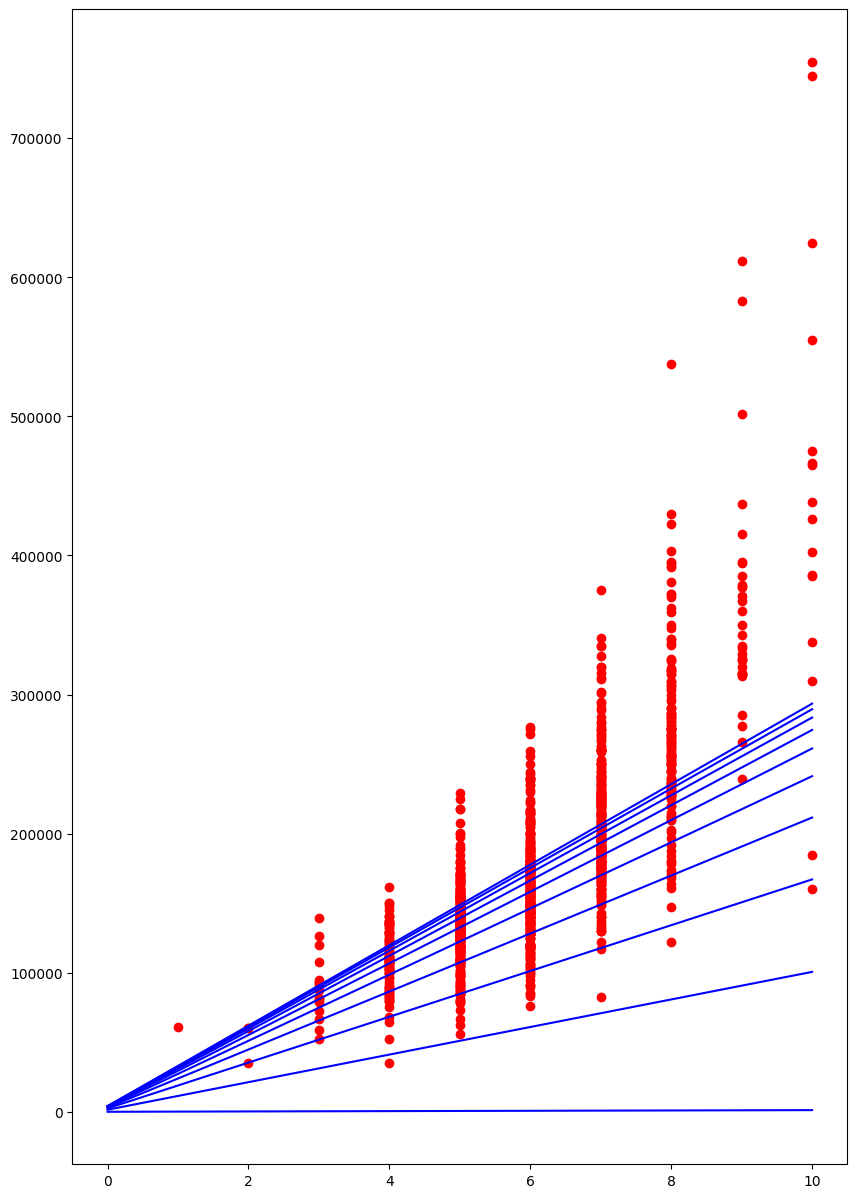

In [31]:
models1,error1 = regresion(train["OverallQual"],train["SalePrice"],epochs=1000,imprimir_error_cada=100,alpha=0.0001)
graph(error1)
model_graph(train["OverallQual"],train["SalePrice"],models_cada=100,models=models1)


### Curva de error y Diagrama de dispersion 1stFlrSF

El error en la iteración 0 es 2.663899428087617e+16
El error en la iteración 10 es 2.037985709030171e+16
El error en la iteración 20 es 1.576930456896363e+16
El error en la iteración 30 es 1.2373118496377714e+16
El error en la iteración 40 es 9871448731855024.0
El error en la iteración 50 es 8028689979089354.0
El error en la iteración 60 es 6671292664120932.0
El error en la iteración 70 es 5671418172564489.0
El error en la iteración 80 es 4934899109161919.0
El error en la iteración 90 es 4392370686346199.0
El error en la iteración 100 es 3992738002946602.5
El error en la iteración 110 es 3698363966466822.0
El error en la iteración 120 es 3481524661229980.5
El error en la iteración 130 es 3321798331742245.5
El error en la iteración 140 es 3204142077775857.0
El error en la iteración 150 es 3117475125822849.5
El error en la iteración 160 es 3053635250535991.5
El error en la iteración 170 es 3006610062746684.5
El error en la iteración 180 es 2971970767368193.5
El error en la iteración 190 

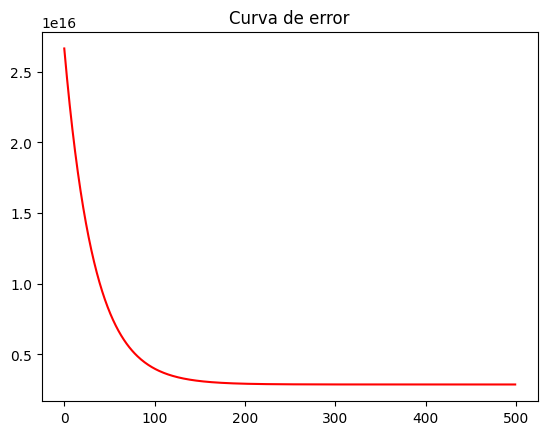

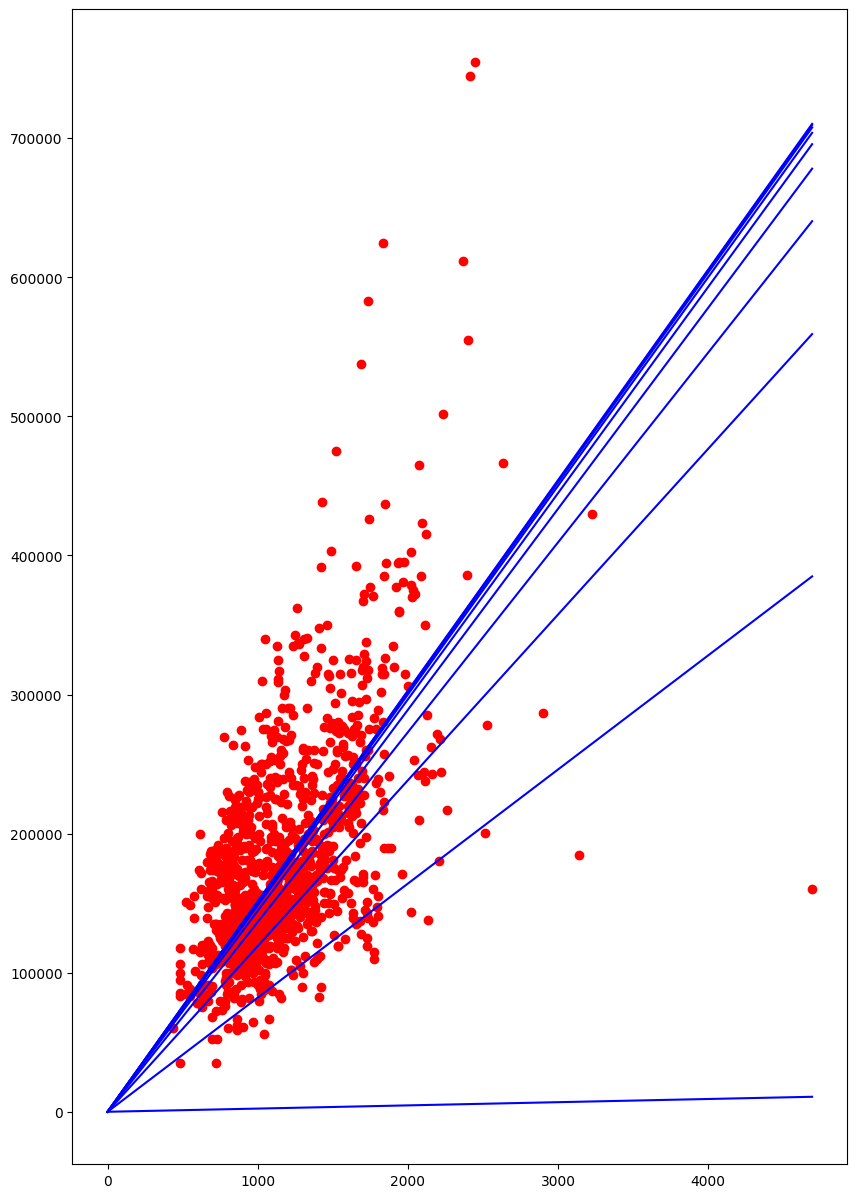

In [32]:
models2,error2 = regresion(train["1stFlrSF"],train["SalePrice"],epochs=500,imprimir_error_cada=10,alpha=0.00000001)
graph(error2)
model_graph(train["1stFlrSF"],train["SalePrice"],models_cada=50,models=models2)

### Instala Sklearn

In [33]:
from sklearn.linear_model import LinearRegression 

## Modelos 

In [34]:
regresion_x1 = LinearRegression().fit(npy.asarray(train["OverallQual"]).reshape(-1,1),npy.asarray(train["SalePrice"]))
regresion_x2 = LinearRegression().fit(npy.asarray(train["1stFlrSF"]).reshape(-1,1),npy.asarray(train["SalePrice"]))

## Predicciones

In [35]:
def averagemodel(model1,model2,data):
    model1_prediction = npy.dot(model1,npy.array([data,npy.ones(len(data))]))
    model2_prediction = model2.predict(npy.asarray(data).reshape(-1,1))
    model_average = (model1_prediction + model2_prediction)/2
    return model1_prediction,model2_prediction,model_average

## Validacion

In [36]:
variable1_modelo1, variable1_modelo2,variable1_average = averagemodel(models1[-1],regresion_x1,valid["OverallQual"])
variable2_modelo1, variable2_modelo2,variable2_average = averagemodel(models2[-1],regresion_x2,valid["1stFlrSF"])

error_variable1_modelo1 = abs(valid["SalePrice"]-variable1_modelo1)
error_variable1_modelo2 = abs(valid["SalePrice"]-variable1_modelo2)
error_variable1_modelaverage = abs(valid["SalePrice"]-variable1_average)

error_variable2_modelo1 = abs(valid["SalePrice"]-variable2_modelo1)
error_variable2_modelo2 = abs(valid["SalePrice"]-variable2_modelo2)
error_variable2_modelaverage = abs(valid["SalePrice"]-variable2_average)

error_df = pds.DataFrame({"Error_variable1_modelo1": error_variable1_modelo1,
                            "Error_variable1_modelo2": error_variable1_modelo2,
                            "Error_variable1_Average": error_variable1_modelaverage,
                            "Error_variable2_modelo1": error_variable2_modelo1,
                            "Error_variable2_modelo2": error_variable2_modelo2,
                            "Error_variable2_Average": error_variable2_modelaverage})

error_df.describe()


,Error_variable1_modelo1,Error_variable1_modelo2,Error_variable1_Average,Error_variable2_modelo1,Error_variable2_modelo2,Error_variable2_Average
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,36442.637310,32618.714218,33391.287707,44757.947198,45556.455649,44809.322581
std,38811.094824,33925.541656,35830.729434,41964.560314,41576.716282,41664.910897
min,28.033249,118.853033,46.661754,30.118270,202.413453,191.638569
25%,11088.303965,9706.665999,10612.845501,14037.926023,18010.491443,16440.128176
50%,26239.940552,22500.000000,22453.338246,35171.486254,36300.692710,35610.450079
75%,48382.710202,43682.291930,45774.021880,61236.908633,55863.302260,56158.429905
max,289639.874055,245104.860479,267372.367267,254835.734404,276661.524528,265748.629466


## Graficas de Error por cada Modelo

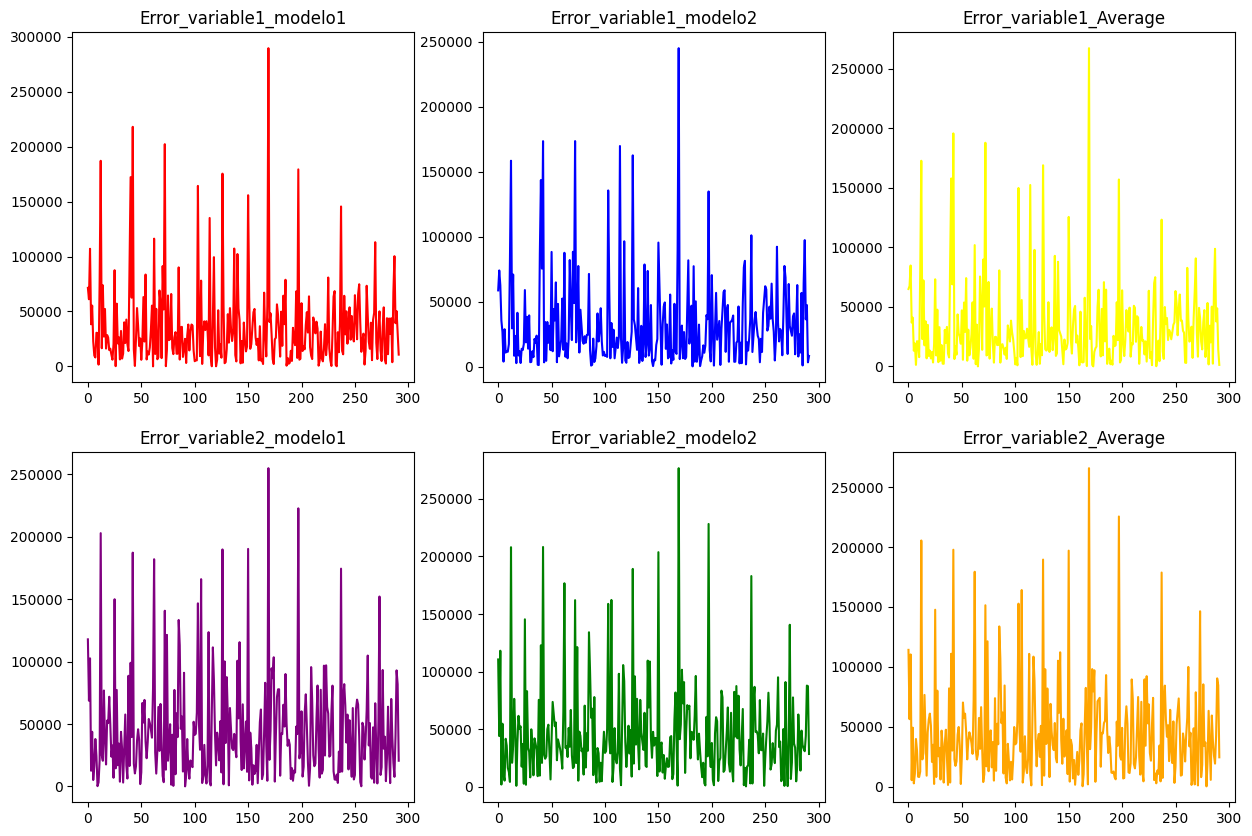

In [37]:
figura, ejes = mpl.subplots(nrows=2,ncols=3,figsize=(15,10))
index=0
colors=["red","blue","yellow","purple","green","orange"]
for i in range(2):
    for j in range(3):
        ejes[i][j].plot(error_df.iloc[:,index],color=colors[index])
        ejes[i][j].set_title(error_df.columns[index])
        index += 1
mpl.show()       

## Conclusion 

Vemos como un modelo de regresion lineal no se ajusta muy bien a esta proyeccion debido a que tanto el rango como la desviacion estandar son muy grandes. Con respecto a cuales fueron los modelos que mas se ajustaron para cada una de las variables fue el modelo de sklearn para la variable 1 y el modelo de promedios de los dos modelos para la variable 2 debido a que tienen una media de errores y desviaciones estandar de errores mas pequeñas.

VIDEO